Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path('C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train')
data_dir_test = pathlib.Path('C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split=0.2, subset='training', label_mode='categorical', image_size=(img_height, img_width), batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split=0.2, subset='validation', label_mode='categorical', image_size=(img_height, img_width), batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# Listing out all the classes of skin cancer and storing them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Creating a dataframe with path to images

In [9]:
from glob import glob
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_original

['C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\T

In [10]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [11]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [12]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

In [13]:
original_df

,Path,Label
0,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,actinic keratosis
1,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,actinic keratosis
2,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,actinic keratosis
3,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,actinic keratosis
4,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,actinic keratosis
...,...,...
2234,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,vascular lesion
2235,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,vascular lesion
2236,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,vascular lesion
2237,C:\Users\ankit\Desktop\upGrad\Course 6\Module ...,vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

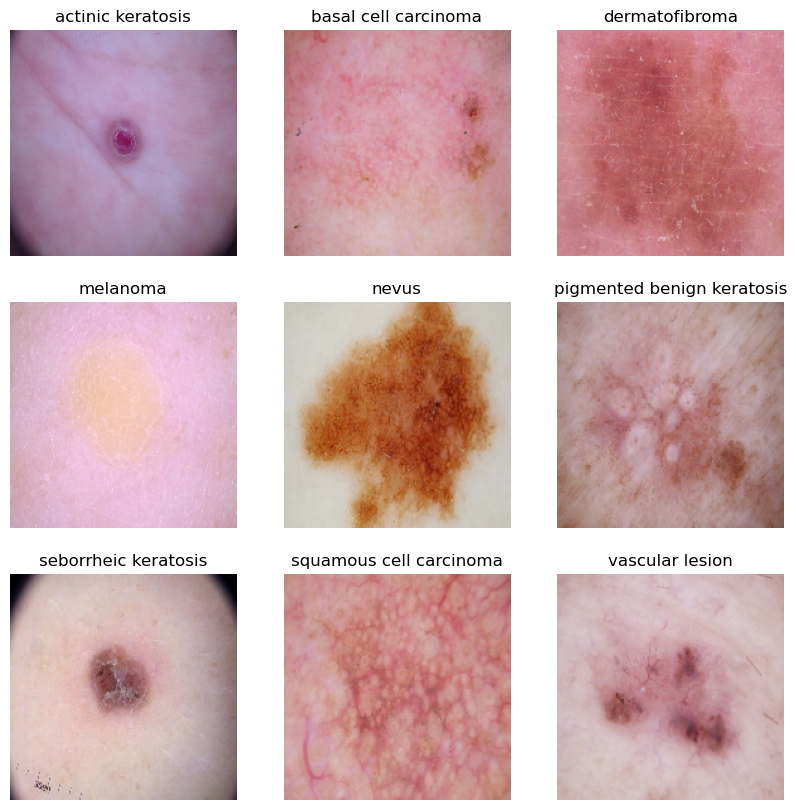

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# CNN Model Creation

## Model 1.1 : Conv Layer with Batch Normalization, MaxPooling

### Model Structure

In [226]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

C:\Users\ankit\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model

In [227]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [228]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the model

In [229]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.2679 - loss: 34.3754 - val_accuracy: 0.1790 - val_loss: 65.8037
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.3434 - loss: 1.9030 - val_accuracy: 0.1678 - val_loss: 109.4024
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4293 - loss: 1.6216 - val_accuracy: 0.1700 - val_loss: 124.4693
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4940 - loss: 1.3361 - val_accuracy: 0.1902 - val_loss: 131.5561
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5054 - loss: 1.3166 - val_accuracy: 0.2013 - val_loss: 107.4867
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5763 - loss: 1.1166 - val_accuracy: 0.1991 - val_loss: 77.1699
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5742 - loss: 1.1015 - val_accuracy: 0.2416 - val_loss: 44.2226
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6317 - loss: 0.9389 - val_accuracy

### Visualizing training results

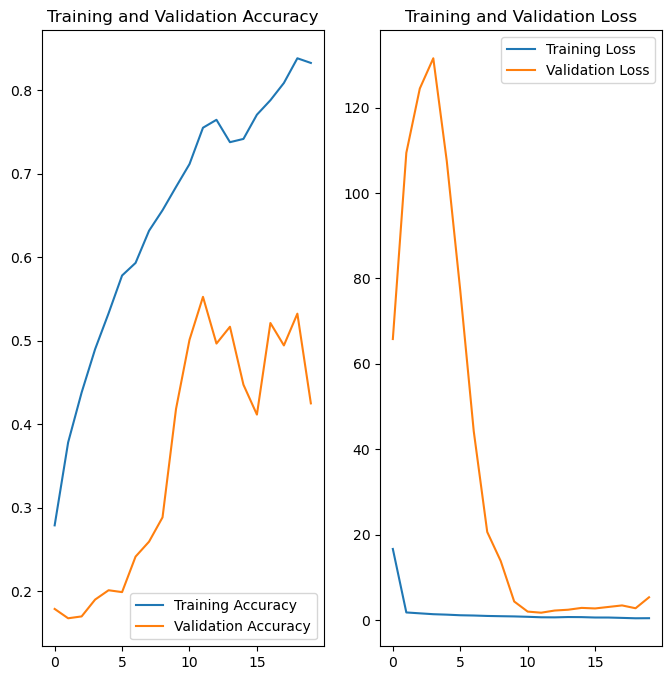

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations from Model 1.1
- Model is clearly overfitting with 80% train accuracy and 42% validation accuracy
- This could be due to absence of dropout layer or regularization

## Model 1.2 : Adding L2 Regularization

### Model Structure

In [231]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

In [232]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [233]:
# View the summary of all layers
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the Model

In [234]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.2561 - loss: 69.3183 - val_accuracy: 0.0872 - val_loss: 86.0423
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3353 - loss: 18.0102 - val_accuracy: 0.0828 - val_loss: 48.8292
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3468 - loss: 9.5722 - val_accuracy: 0.0895 - val_loss: 24.4920
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.3956 - loss: 5.4820 - val_accuracy: 0.1902 - val_loss: 15.3674
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.4134 - loss: 3.6139 - val_accuracy: 0.1409 - val_loss: 6.9793
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.4221 - loss: 2.6987 - val_accuracy: 0.2707 - val_loss: 3.1685
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.4392 - loss: 2.1394 - val_accuracy: 0.2707 - val_loss: 3.2750
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.5387 - loss: 1.8022 - val_accuracy: 0.27

### Visualizing Training Results

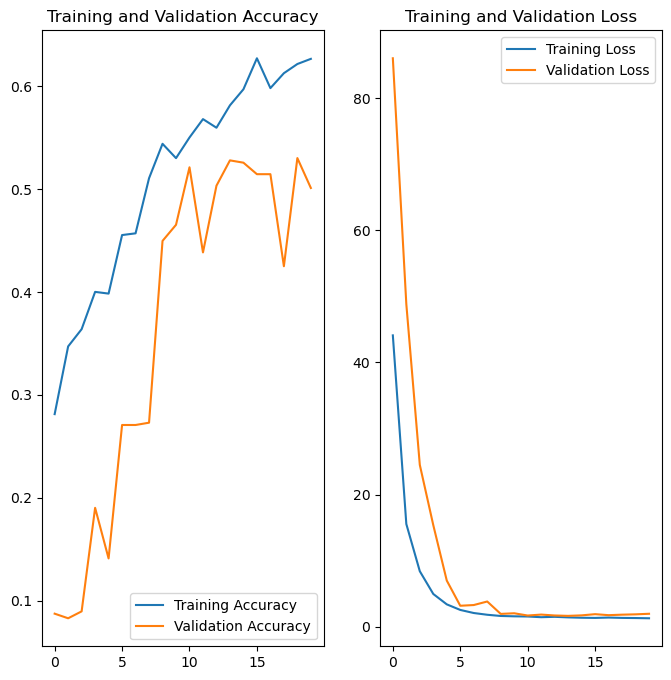

In [235]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations from model 1.2
- With the addition of L2 regularization the training accuracy drops to 63% while validation accuracy improves to 50%
- This is not a overfitting model but the overall accuracy is low

## Model 1.3 : Adding dropout layer to first model

### Model Structure

In [236]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

In [237]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [238]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the model 

In [239]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.2491 - loss: 65.7271 - val_accuracy: 0.1521 - val_loss: 69.1261
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.2194 - loss: 2.8476 - val_accuracy: 0.0872 - val_loss: 144.3515
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2097 - loss: 2.2155 - val_accuracy: 0.0872 - val_loss: 153.4995
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.2726 - loss: 2.1111 - val_accuracy: 0.0872 - val_loss: 168.0228
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2581 - loss: 2.0489 - val_accuracy: 0.0872 - val_loss: 151.9223
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2781 - loss: 2.0438 - val_accuracy: 0.0895 - val_loss: 120.7630
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2742 - loss: 1.9935 - val_accuracy: 0.1096 - val_loss: 60.2732
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.2475 - loss: 1.9819 - val_accurac

### Visualizing Training Results

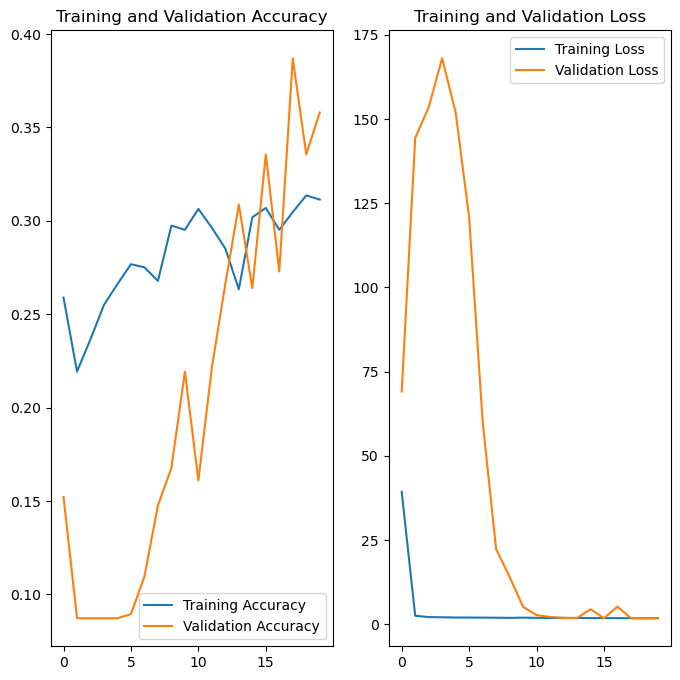

In [240]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observation from Model 1.3
- Addition of dropout layers after Conv and dense layer reduced the training and validation accuracy to 30% and 36% respectively.
- Higher validation accuracy means that the dropout layer is dropping some significant information of previous layer leading to very less accuracy

# Distribution of classes in the training dataset

In [16]:
def count_class_distribution(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = count_class_distribution(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

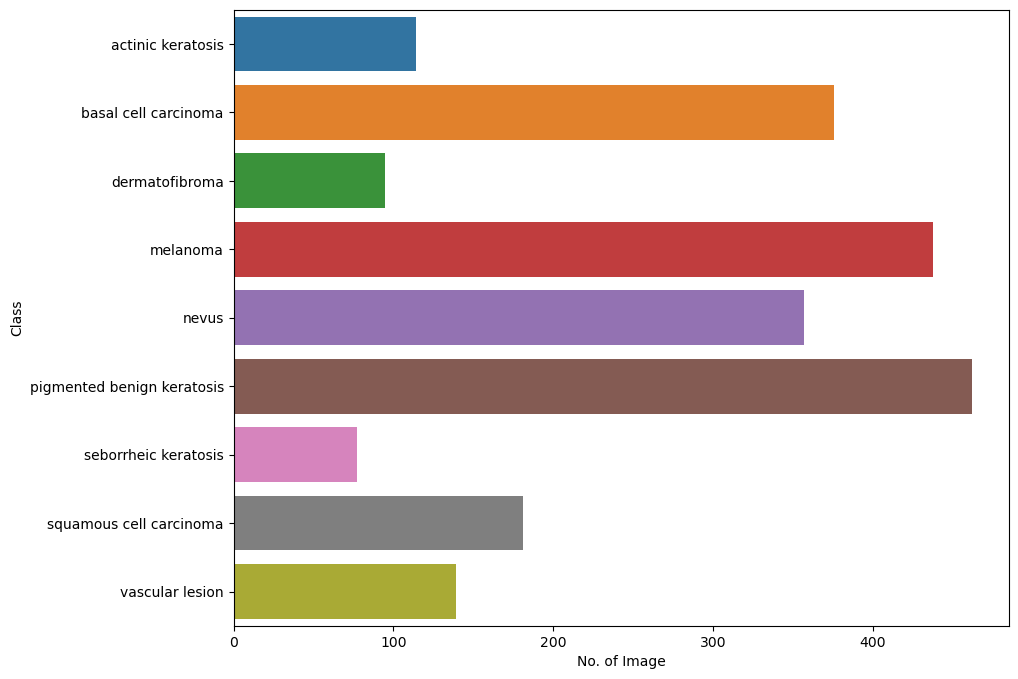

In [17]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

## Class Distribution Findings:
- 'seborrheic kertosis' class has least number(77) of samples out of 2357 samples
-  'pigmented benign keratosis' class has highest number(462) of samples out of 2357 samples


# Rectifying the class imbalance

In [18]:
!pip install Augmentor


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
path_to_training_dataset = "C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24366DD3C70>: 100%|█| 500/500 [00:03<00:00, 163.17 Samples


Initialised with 376 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x243655E9870>: 100%|█| 500/500 [00:02<00:00, 175.27 Samples


Initialised with 95 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24366D9CE80>: 100%|█| 500/500 [00:02<00:00, 167.58 Samples


Initialised with 438 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24366DF02E0>: 100%|█| 500/500 [00:16<00:00, 29.73 Samples


Initialised with 357 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24366E63790>: 100%|█| 500/500 [00:19<00:00, 25.61 Samples/


Initialised with 462 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x243594B52D0>: 100%|█| 500/500 [00:03<00:00, 148.21 Samples


Initialised with 77 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x243655E9BA0>: 100%|█| 500/500 [00:08<00:00, 56.74 Samples


Initialised with 181 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24366E61450>: 100%|█| 500/500 [00:03<00:


Initialised with 139 image(s) found.
Output directory set to C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24366D84280>: 100%|█| 500/500 [00:03<00:00, 128.99 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [20]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


# Distribution of augmented data after adding new images to the original training data.

In [21]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'C:\\Users\\ankit\\Desktop\\upGrad\\Course 6\\Module 4 - Melanoma Detection Assignment\\Skin cancer ISIC Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3263ee8b-34c0-44a2-bd07-a81fe0e22837.jpg'

In [22]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [23]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [24]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\ankit\AppData\Local\Temp\ipykernel_19440\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [25]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Model 1.4: Training the model on data created using Augmentor

In [26]:
batch_size = 32
img_height = 180
img_width = 180

### Creating a training dataset

In [27]:
data_dir_train=pathlib.Path('C:/Users/ankit/Desktop/upGrad/Course 6/Module 4 - Melanoma Detection Assignment/Skin cancer ISIC Imaging Collaboration/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  label_mode='categorical',
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Creating a validation dataset

In [28]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  label_mode='categorical',
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model Structure

In [30]:
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))

C:\Users\ankit\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [32]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 99s 572ms/step - accuracy: 0.2273 - loss: 2.0417 - val_accuracy: 0.4328 - val_loss: 1.4926
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 95s 564ms/step - accuracy: 0.4112 - loss: 1.5141 - val_accuracy: 0.4143 - val_loss: 1.4819
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 517ms/step - accuracy: 0.4806 - loss: 1.3676 - val_accuracy: 0.5108 - val_loss: 1.2746
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 90s 529ms/step - accuracy: 0.5356 - loss: 1.2189 - val_accuracy: 0.5776 - val_loss: 1.1100
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 514ms/step - accuracy: 0.6037 - loss: 1.0506 - val_accuracy: 0.6132 - val_loss: 1.0658
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 519ms/step - accuracy: 0.6498 - loss: 0.9643 - val_accuracy: 0.6704 - val_loss: 0.8984
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 474ms/step - accuracy: 0.6892 - loss: 0.8250 - val_accuracy: 0.6845 - val_loss: 0.8692
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 459ms/step - accuracy: 0.7146 - loss: 0

### Visualizing the model results

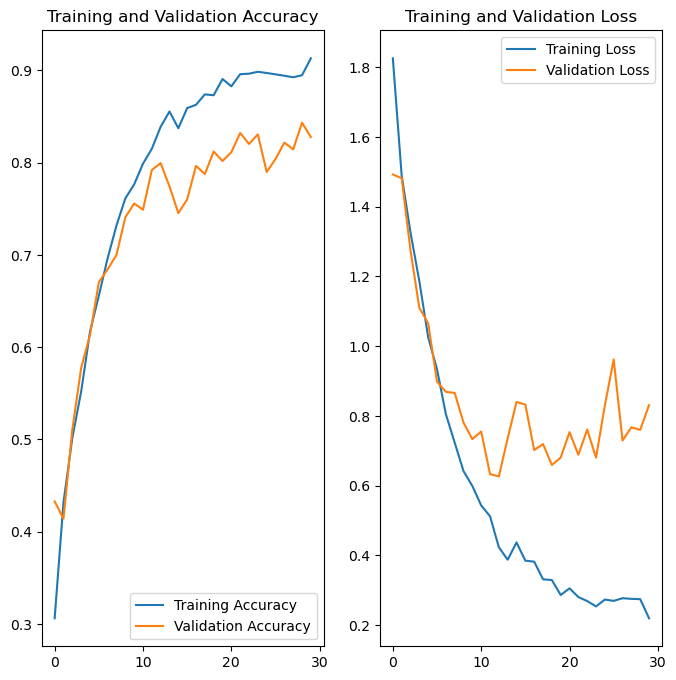

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observation from Model 1.4
- Adding a Conv layer with 128 filters and reducing the number of neurons in dense layer to 128 from 512 significantly improved both training and validation accuracy

- With the above changes the training accuracy improves to 91% and validation accuracy improves to 83%

In [35]:
keras.__version__

'3.4.1'